In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## **Data Collection, Analysis and Processing**

In [3]:
customer_df = pd.read_csv("/content/WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [4]:
customer_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
customer_df.shape

(7043, 21)

In [6]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


### **Data Visualization**

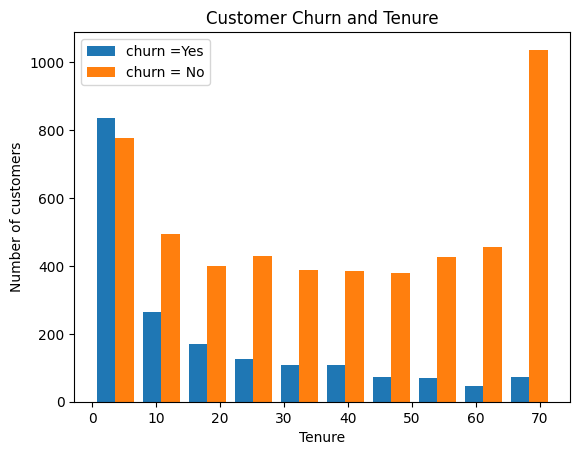

In [7]:
# Tenure with Churn
churn_tenure_no = customer_df[customer_df['Churn']=='No'].tenure
churn_tenure_yes = customer_df[customer_df['Churn']=='Yes'].tenure

plt.xlabel("Tenure")
plt.ylabel("Number of customers")
plt.title("Customer Churn and Tenure")

plt.hist([churn_tenure_yes,churn_tenure_no], label = ['churn =Yes', 'churn = No'])
plt.legend()

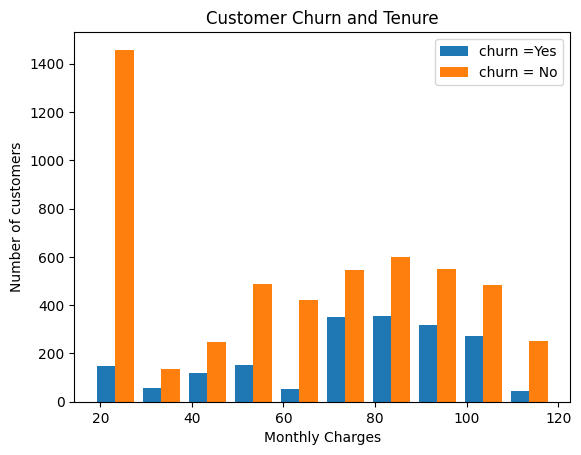

In [8]:
# Monthly Charges with Churn
churn_tenure_no = customer_df[customer_df['Churn']=='No'].MonthlyCharges
churn_tenure_yes = customer_df[customer_df['Churn']=='Yes'].MonthlyCharges

plt.xlabel("Monthly Charges")
plt.ylabel("Number of customers")
plt.title("Customer Churn and Tenure")

plt.hist([churn_tenure_yes,churn_tenure_no], label = ['churn =Yes', 'churn = No'])
plt.legend()

### **Data Processing**

In [9]:
# Drop the customerID column as it has no use in Model Building
customer_df.drop('customerID', axis =1, inplace=True)

In [10]:
customer_df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [11]:
# Type of Total Charges is Object which should be numeric. Convert Object to numeric type
customer_df['TotalCharges'].values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

Total charges contains values in string format

In [12]:
# COnverting object to numeric
customer_df['TotalCharges'] = pd.to_numeric(customer_df.TotalCharges, errors = 'coerce')
# Convert the data type to numeric if they are numbers otherwise to null

In [13]:
customer_df['TotalCharges'].dtype

dtype('float64')

In [14]:
customer_df[customer_df['TotalCharges'].isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [15]:
# Checking for null values in TotalCharges
len(customer_df[customer_df['TotalCharges'].isnull()])

11

We can see there is 11 columns with NULL values so we can just drop 11 columns out of total 7043 columns

In [16]:
# Dropping the rows containing NULL values
# drop_df = customer_df[customer_df['TotalCharges']!= NaN]
customer_churn_df = customer_df[customer_df['TotalCharges'].notnull()]

In [17]:
customer_churn_df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [18]:
customer_churn_df.shape

(7032, 20)

In [19]:
# Sepearating text data and numerical data
numerical_data = []
text_data = []
for col in customer_churn_df.columns:
  if customer_churn_df[col].dtype == 'object':
    text_data.append(col)
  else:
    numerical_data.append(col)

print(numerical_data)
print(text_data)

['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']
['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']


In [20]:
# details of numerical column
for col in numerical_data:
  print(f"{col}")
  print("Statistical measures: \n",customer_churn_df[col].describe())
  print("Total Null values:", customer_churn_df[col].isnull().sum())
  print("**********************")

SeniorCitizen
Statistical measures: 
 count    7032.000000
mean        0.162400
std         0.368844
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: SeniorCitizen, dtype: float64
Total Null values: 0
**********************
tenure
Statistical measures: 
 count    7032.000000
mean       32.421786
std        24.545260
min         1.000000
25%         9.000000
50%        29.000000
75%        55.000000
max        72.000000
Name: tenure, dtype: float64
Total Null values: 0
**********************
MonthlyCharges
Statistical measures: 
 count    7032.000000
mean       64.798208
std        30.085974
min        18.250000
25%        35.587500
50%        70.350000
75%        89.862500
max       118.750000
Name: MonthlyCharges, dtype: float64
Total Null values: 0
**********************
TotalCharges
Statistical measures: 
 count    7032.000000
mean     2283.300441
std      2266.771362
min        18.800000
25%       401.450000
50%      139

**'SeniorCitizen' is a categorical column**

In [21]:
customer_churn_df['SeniorCitizen'].value_counts()

0    5890
1    1142
Name: SeniorCitizen, dtype: int64

In [22]:
# information about the text column
for col in text_data:
  print(col)
  print("Total count: ", customer_churn_df[col].count())
  print("Data:\n",customer_churn_df[col].value_counts())
  print("Number of unique data: ", len(customer_churn_df[col].unique()))
  print("Total Null value: ", customer_churn_df[col].isnull().sum())
  print("******************************")


gender
Total count:  7032
Data:
 Male      3549
Female    3483
Name: gender, dtype: int64
Number of unique data:  2
Total Null value:  0
******************************
Partner
Total count:  7032
Data:
 No     3639
Yes    3393
Name: Partner, dtype: int64
Number of unique data:  2
Total Null value:  0
******************************
Dependents
Total count:  7032
Data:
 No     4933
Yes    2099
Name: Dependents, dtype: int64
Number of unique data:  2
Total Null value:  0
******************************
PhoneService
Total count:  7032
Data:
 Yes    6352
No      680
Name: PhoneService, dtype: int64
Number of unique data:  2
Total Null value:  0
******************************
MultipleLines
Total count:  7032
Data:
 No                  3385
Yes                 2967
No phone service     680
Name: MultipleLines, dtype: int64
Number of unique data:  3
Total Null value:  0
******************************
InternetService
Total count:  7032
Data:
 Fiber optic    3096
DSL            2416
No             

We can see there is 'No internet Service' and 'No Phone services' in some of the categorical column which is equal to 'No'. So we can replace them with 'No'

In [23]:
customer_churn_df.replace('No internet service', 'No', inplace=True)
customer_churn_df.replace('No phone service', 'No', inplace=True)

<ipython-input-23-67bedc9e9092>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customer_churn_df.replace('No internet service', 'No', inplace=True)
<ipython-input-23-67bedc9e9092>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customer_churn_df.replace('No phone service', 'No', inplace=True)


In [24]:
for col in text_data:
   print(f'{col} : {customer_churn_df[col].unique()}')

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes']
OnlineBackup : ['Yes' 'No']
DeviceProtection : ['No' 'Yes']
TechSupport : ['No' 'Yes']
StreamingTV : ['No' 'Yes']
StreamingMovies : ['No' 'Yes']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


We can see most of the column just containes 'yes' and 'no', we can replace these with 1 and 0

In [25]:
yes_no_col = []
for col in text_data:
  if 'Yes' in  customer_churn_df[col].unique():
    yes_no_col.append(col)

print(yes_no_col)

['Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'Churn']


In [26]:
# Replace all 'yes' with 1 and 'no' with 0
for col in yes_no_col:
  customer_churn_df[col].replace({'Yes':1, 'No': 0}, inplace=True)

<ipython-input-26-4038b97e3f70>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customer_churn_df[col].replace({'Yes':1, 'No': 0}, inplace=True)


In [27]:
for col in yes_no_col:
   print(f'{col} : {customer_churn_df[col].unique()}')

Partner : [1 0]
Dependents : [0 1]
PhoneService : [0 1]
MultipleLines : [0 1]
OnlineSecurity : [0 1]
OnlineBackup : [1 0]
DeviceProtection : [0 1]
TechSupport : [0 1]
StreamingTV : [0 1]
StreamingMovies : [0 1]
PaperlessBilling : [1 0]
Churn : [0 1]


In [28]:
# Replace female with 1 and male with 0
customer_churn_df['gender'].replace({'Female':1, 'Male': 0}, inplace=True)

<ipython-input-28-cef4a9dd5144>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customer_churn_df['gender'].replace({'Female':1, 'Male': 0}, inplace=True)


In [29]:
customer_churn_df['gender'].value_counts()

0    3549
1    3483
Name: gender, dtype: int64

In [30]:
# Performing One hot encoding on the rest of the categorical column with more than 2 unique value.

categorical_col = []
for col in text_data:
  if customer_churn_df[col].dtype == 'object':
    categorical_col.append(col)

categorical_col

['InternetService', 'Contract', 'PaymentMethod']

In [31]:
# Use get_dummies to perform encoding
churn_prediction_df = pd.get_dummies(data = customer_churn_df, columns = categorical_col)

In [32]:
churn_prediction_df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,1,0,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0
1,0,0,0,0,34,1,0,1,0,1,...,1,0,0,0,1,0,0,0,0,1
2,0,0,0,0,2,1,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
3,0,0,0,0,45,0,0,1,0,1,...,1,0,0,0,1,0,1,0,0,0
4,1,0,0,0,2,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0


In [33]:
churn_prediction_df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [34]:
churn_prediction_df.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                          uint8
InternetService_Fiber optic                  uint8
InternetService_No             

All the columns are numeric type

### **Data Standardization**

In [35]:
from sklearn.preprocessing import MinMaxScaler

In [36]:
cols_scale = ['tenure', 'MonthlyCharges', 'TotalCharges']

scaler = MinMaxScaler()

churn_prediction_df[cols_scale] = scaler.fit_transform(churn_prediction_df[cols_scale])

In [37]:
churn_prediction_df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,0.000000,0,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0
1,0,0,0,0,0.464789,1,0,1,0,1,...,1,0,0,0,1,0,0,0,0,1
2,0,0,0,0,0.014085,1,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
3,0,0,0,0,0.619718,0,0,1,0,1,...,1,0,0,0,1,0,1,0,0,0
4,1,0,0,0,0.014085,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0


### **Split into train and test set**

In [48]:
from sklearn.model_selection import train_test_split

In [49]:
# Split the target and Feature
X = churn_prediction_df.drop('Churn', axis =1)
Y = churn_prediction_df['Churn']

print(X.shape)
print(Y.shape)

(7032, 26)
(7032,)


In [50]:
Y.value_counts()

0    5163
1    1869
Name: Churn, dtype: int64

In [51]:
# SPlit into training and test set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=5)

In [52]:
print(X.shape, X_train.shape, X_train.shape)

(7032, 26) (5625, 26) (5625, 26)


# **Model Building**

In [56]:
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import confusion_matrix, classification_report

In [60]:
# Define a function for the model
def ANN(X_train, Y_train, X_test, Y_test, loss):

  model = keras.Sequential([
      keras.layers.Dense(26, input_shape = (26,), activation='relu'),
      keras.layers.Dense(15, activation='relu'),
      keras.layers.Dense(15, activation='relu'),
      keras.layers.Dense(1, activation = 'sigmoid')
  ])

  model.compile(
      optimizer='adam',
      loss = loss,
      metrics=['accuracy']
  )

  model.fit(X_train, Y_train, epochs=100)

  print(model.evaluate(X_test, Y_test))

  Y_pred = model.predict(X_test)
  Y_pred = np.round(Y_pred)

  print("Classification Report: \n", classification_report(Y_test, Y_pred))

  return Y_pred

In [61]:
Y_pred = ANN(X_train, Y_train, X_test, Y_test, 'binary_crossentropy')

Epoch 1/100
176/176 [==============================] - 2s 2ms/step - loss: 0.5155 - accuracy: 0.7554
Epoch 2/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4273 - accuracy: 0.7956
Epoch 3/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4188 - accuracy: 0.8021
Epoch 4/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4154 - accuracy: 0.8060
Epoch 5/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4130 - accuracy: 0.8055
Epoch 6/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4113 - accuracy: 0.8071
Epoch 7/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4099 - accuracy: 0.8068
Epoch 8/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4080 - accuracy: 0.8085
Epoch 9/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4066 - accuracy: 0.8096
Epoch 10/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4060 - accura

In [62]:
Y_pred

array([[0.],
       [0.],
       [0.],
       ...,
       [1.],
       [1.],
       [1.]], dtype=float32)

In [63]:
# Confusion Matrix
cm = tf.math.confusion_matrix(Y_test, Y_pred)
cm

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[871, 128],
       [194, 214]], dtype=int32)>

Text(50.722222222222214, 0.5, 'Truth Values')

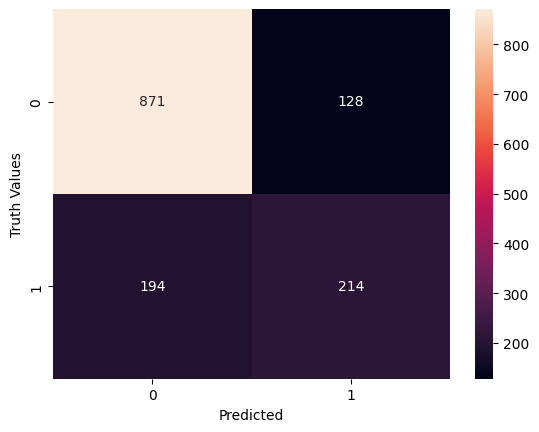

In [64]:
# Plot confusion matrix
import seaborn as sns

sns.heatmap(cm, annot = True, fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel("Truth Values")

In [199]:
# accuracy according to the confusion matrix
# (True positive+True Negative)/ (True Positive + False positve + False negative + True Negative)
round(((836+214)/(836+163+194+214)),2)

0.75

We can see this value is equal to the accuracy in classification report

In [203]:
# Precision for value 0
# (True Positive)/(TruePositive + FalsePositive)
round(((836)/(836+194)),2)

0.81

In [202]:
# Precision for value 1
# (True Negative)/ (True Negative + False Negative)
round(((214)/(214+163)),2)

0.57

In [209]:
# Recall for value 0
#(True Positive)/(True Positve + False Negative)
round(((836)/(836+163)),2)

0.84

In [210]:
# Recall for value 1
#(True Negative)/(True Negative + False Positive)
round(((214)/(214+194)),2)

0.52

In [212]:
# F1 score for value 0
# (2*precision*recall)/ Precision + recall
round((2 * 0.81 * 0.84)/(0.81+0.84),2)

0.82

In [213]:
# F1 score for value 1
# (2*precision*recall)/ Precision + recall
round((2 * 0.57 * 0.52)/(0.57+0.52),2)

0.54

## **Handling the imbalanced dataset**

We can see that the value of precision and recall is good for '0' but poor for '1' this is because of the imbalanced data.

In [67]:
# Churn classes count
churn_0, churn_1 = churn_prediction_df['Churn'].value_counts()

churn_0, churn_1

(5163, 1869)

In [ ]:
# Divide the dataframe by churn classes
churn_0_df = churn_prediction_df[churn_prediction_df['Churn']== 0]
churn_1_df = churn_prediction_df[churn_prediction_df['Churn']== 1]

print(churn_0_df.shape)
print(churn_1_df.shape)

(5163, 27)
(1869, 27)


### Undersampling method

Take the same about of sample from churn_0_df as the count of churn_1

In [74]:
sample_churn_0_df = churn_0_df.sample(churn_1)
sample_churn_0_df.shape

(1869, 27)

In [76]:
# Combine sample churn 0 with churn 1 df

combined_churn_df = pd.concat([sample_churn_0_df, churn_1_df], axis = 0)
combined_churn_df.Churn.value_counts()

0    1869
1    1869
Name: Churn, dtype: int64

In [77]:
# Split the feature and target
X = combined_churn_df.drop("Churn", axis = 1)
Y = combined_churn_df['Churn']

In [91]:
X_train,X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 15, stratify = Y)

In [79]:
X.shape,X_train.shape,X_test.shape

((3738, 26), (2990, 26), (748, 26))

In [80]:
Y_train.value_counts()

0    1495
1    1495
Name: Churn, dtype: int64

In [81]:
Y_test.value_counts()

1    374
0    374
Name: Churn, dtype: int64

In [82]:
Y_pred = ANN(X_train, Y_train, X_test, Y_test, 'binary_crossentropy')

Epoch 1/100
94/94 [==============================] - 2s 4ms/step - loss: 0.6178 - accuracy: 0.6779
Epoch 2/100
94/94 [==============================] - 0s 4ms/step - loss: 0.5155 - accuracy: 0.7559
Epoch 3/100
94/94 [==============================] - 0s 4ms/step - loss: 0.4994 - accuracy: 0.7599
Epoch 4/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4923 - accuracy: 0.7602
Epoch 5/100
94/94 [==============================] - 0s 4ms/step - loss: 0.4859 - accuracy: 0.7689
Epoch 6/100
94/94 [==============================] - 0s 4ms/step - loss: 0.4839 - accuracy: 0.7662
Epoch 7/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4801 - accuracy: 0.7676
Epoch 8/100
94/94 [==============================] - 0s 4ms/step - loss: 0.4755 - accuracy: 0.7742
Epoch 9/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4742 - accuracy: 0.7706
Epoch 10/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4725 - accuracy: 0.7746
Epoch 11/

Now the precision and recall for churn class 1 is increased

## Oversampling

In this we duplicate and increases the samples of churn class 1 and make it equal to churn class 0

In [84]:
churn_0, churn_1

(5163, 1869)

In [86]:
sample_churn_1_df = churn_1_df.sample(churn_0, replace = True)
# By keeping replace = true, it will randomly duplicate row to match the required number of samples

sample_churn_1_df.shape

(5163, 27)

In [88]:
# Combine both the dataframe

over_combined_df = pd.concat([churn_0_df, sample_churn_1_df], axis = 0)
over_combined_df.shape

(10326, 27)

In [89]:
over_combined_df.Churn.value_counts()

0    5163
1    5163
Name: Churn, dtype: int64

In [94]:
# Split the feature and target
X = over_combined_df.drop("Churn", axis = 1)
Y = over_combined_df['Churn']

In [95]:
X_train,X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 15, stratify = Y)

In [96]:
X.shape, X_train.shape, X_test.shape

((10326, 26), (8260, 26), (2066, 26))

In [97]:
Y_train.value_counts()

1    4130
0    4130
Name: Churn, dtype: int64

In [98]:
Y_pred = ANN(X_train, Y_train, X_test, Y_test, 'binary_crossentropy')

Epoch 1/100
259/259 [==============================] - 2s 5ms/step - loss: 0.5512 - accuracy: 0.7272
Epoch 2/100
259/259 [==============================] - 1s 5ms/step - loss: 0.4891 - accuracy: 0.7615
Epoch 3/100
259/259 [==============================] - 1s 5ms/step - loss: 0.4810 - accuracy: 0.7659
Epoch 4/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4762 - accuracy: 0.7701
Epoch 5/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4713 - accuracy: 0.7706
Epoch 6/100
259/259 [==============================] - 1s 2ms/step - loss: 0.4675 - accuracy: 0.7729
Epoch 7/100
259/259 [==============================] - 1s 2ms/step - loss: 0.4642 - accuracy: 0.7775
Epoch 8/100
259/259 [==============================] - 1s 2ms/step - loss: 0.4595 - accuracy: 0.7791
Epoch 9/100
259/259 [==============================] - 1s 2ms/step - loss: 0.4568 - accuracy: 0.7811
Epoch 10/100
259/259 [==============================] - 1s 2ms/step - loss: 0.4565 - accura

## Synthetic Minority Oversampling Technique(SMOTE)

 SMOTE first selects a minority class instance a at random and finds its k nearest minority class neighbors. The synthetic instance is then created by choosing one of the k nearest neighbors b at random and connecting a and b to form a line segment in the feature space. The synthetic instances are generated as a convex combination of the two chosen instances a and b.

In [100]:
# Install --> pip install -U imbalanced-learn
from imblearn.over_sampling import SMOTE

In [102]:
# Use the original data churn_prediction_df

smote = SMOTE(sampling_strategy='minority')
X_sm, Y_sm = smote.fit_resample(X, Y)

In [103]:
Y_sm.value_counts()

0    5163
1    5163
Name: Churn, dtype: int64

In [104]:
X_train,X_test, Y_train, Y_test = train_test_split(X_sm, Y_sm, test_size = 0.2, random_state = 15, stratify = Y_sm)

In [105]:
Y_train.value_counts()

1    4130
0    4130
Name: Churn, dtype: int64

In [106]:
Y_pred = ANN(X_train, Y_train, X_test, Y_test, 'binary_crossentropy')

Epoch 1/100
259/259 [==============================] - 2s 4ms/step - loss: 0.5747 - accuracy: 0.7058
Epoch 2/100
259/259 [==============================] - 2s 6ms/step - loss: 0.4952 - accuracy: 0.7592
Epoch 3/100
259/259 [==============================] - 1s 5ms/step - loss: 0.4864 - accuracy: 0.7646
Epoch 4/100
259/259 [==============================] - 1s 4ms/step - loss: 0.4792 - accuracy: 0.7678
Epoch 5/100
259/259 [==============================] - 1s 2ms/step - loss: 0.4752 - accuracy: 0.7722
Epoch 6/100
259/259 [==============================] - 1s 2ms/step - loss: 0.4715 - accuracy: 0.7720
Epoch 7/100
259/259 [==============================] - 1s 2ms/step - loss: 0.4657 - accuracy: 0.7776
Epoch 8/100
259/259 [==============================] - 1s 2ms/step - loss: 0.4630 - accuracy: 0.7780
Epoch 9/100
259/259 [==============================] - 1s 2ms/step - loss: 0.4601 - accuracy: 0.7785
Epoch 10/100
259/259 [==============================] - 1s 2ms/step - loss: 0.4563 - accura

### Ensemble Method

Divide the whole churn_0_df into small batches and combine it with the churn_1_df and trains all the batches seperately and get the total result

In [114]:
X = churn_prediction_df.drop('Churn', axis = 1)
Y = churn_prediction_df['Churn']

In [115]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=15, stratify=Y)

In [116]:
X.shape, X_train.shape, X_test.shape

((7032, 26), (5625, 26), (1407, 26))

In [117]:
Y_train.value_counts()

0    4130
1    1495
Name: Churn, dtype: int64

We can build 3 model:

model1 --> class1(1495) + class0(0, 1495)

model2 --> class1(1495) + class0(1496, 2990)

model3 --> class1(1495) + class0(2990, 4130)

In [118]:
new_train = X_train.copy()
new_train['Churn'] = Y_train

In [119]:
new_train.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn
684,1,0,0,0,0.000000,1,0,0,0,0,...,1,0,1,0,0,0,0,0,1,0
2446,1,0,0,0,0.239437,1,1,0,1,0,...,1,0,1,0,0,0,1,0,0,1
1680,0,0,1,1,0.774648,1,1,0,0,0,...,0,1,0,1,0,0,0,0,1,0
2220,0,0,1,0,1.000000,1,0,1,1,0,...,0,0,0,0,1,1,0,0,0,0
2842,1,0,0,0,0.042254,0,0,1,0,1,...,0,0,1,0,0,0,0,0,1,0


In [121]:
new_train_class0 = new_train[new_train.Churn==0]
new_train_class1 = new_train[new_train.Churn==1]

In [120]:
# Function to get the sample of X_train and Y_train from the Churn_0_df

def get_train_batch_0(df_0, df_1, start,end):

  df_train = pd.concat([df_0[start:end], df_1],axis = 0 )

  X_train = df_train.drop('Churn',axis = 1)
  Y_train = df_train['Churn']

  return X_train, Y_train

In [123]:
X_train, Y_train = get_train_batch_0(new_train_class0, new_train_class1, 0, 1495)

Y_train.value_counts()

0    1495
1    1495
Name: Churn, dtype: int64

In [124]:
y_pred1 = ANN(X_train, Y_train, X_test, Y_test, 'binary_crossentropy')

Epoch 1/100
94/94 [==============================] - 2s 5ms/step - loss: 0.6521 - accuracy: 0.5441
Epoch 2/100
94/94 [==============================] - 0s 5ms/step - loss: 0.5871 - accuracy: 0.7328
Epoch 3/100
94/94 [==============================] - 0s 5ms/step - loss: 0.5619 - accuracy: 0.7625
Epoch 4/100
94/94 [==============================] - 0s 3ms/step - loss: 0.5498 - accuracy: 0.7682
Epoch 5/100
94/94 [==============================] - 0s 3ms/step - loss: 0.5407 - accuracy: 0.7656
Epoch 6/100
94/94 [==============================] - 1s 7ms/step - loss: 0.5322 - accuracy: 0.7709
Epoch 7/100
94/94 [==============================] - 1s 8ms/step - loss: 0.5259 - accuracy: 0.7692
Epoch 8/100
94/94 [==============================] - 1s 6ms/step - loss: 0.5211 - accuracy: 0.7706
Epoch 9/100
94/94 [==============================] - 0s 4ms/step - loss: 0.5161 - accuracy: 0.7696
Epoch 10/100
94/94 [==============================] - 0s 3ms/step - loss: 0.5105 - accuracy: 0.7763
Epoch 11/

In [127]:
X_train, Y_train = get_train_batch_0(new_train_class0, new_train_class1, 1495, 2990)

y_pred2 = ANN(X_train, Y_train, X_test, Y_test, 'binary_crossentropy')

Epoch 1/100
94/94 [==============================] - 1s 2ms/step - loss: 0.6614 - accuracy: 0.5732
Epoch 2/100
94/94 [==============================] - 0s 2ms/step - loss: 0.5393 - accuracy: 0.7492
Epoch 3/100
94/94 [==============================] - 0s 2ms/step - loss: 0.5020 - accuracy: 0.7569
Epoch 4/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4922 - accuracy: 0.7635
Epoch 5/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4880 - accuracy: 0.7612
Epoch 6/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4822 - accuracy: 0.7622
Epoch 7/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4788 - accuracy: 0.7726
Epoch 8/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4754 - accuracy: 0.7659
Epoch 9/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4721 - accuracy: 0.7692
Epoch 10/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4709 - accuracy: 0.7702
Epoch 11/

In [128]:
X_train, Y_train = get_train_batch_0(new_train_class0, new_train_class1, 2990, 4130)

y_pred3 = ANN(X_train, Y_train, X_test, Y_test, 'binary_crossentropy')

Epoch 1/100
83/83 [==============================] - 1s 2ms/step - loss: 0.6125 - accuracy: 0.6869
Epoch 2/100
83/83 [==============================] - 0s 2ms/step - loss: 0.5076 - accuracy: 0.7594
Epoch 3/100
83/83 [==============================] - 0s 2ms/step - loss: 0.4884 - accuracy: 0.7715
Epoch 4/100
83/83 [==============================] - 0s 2ms/step - loss: 0.4805 - accuracy: 0.7784
Epoch 5/100
83/83 [==============================] - 0s 2ms/step - loss: 0.4760 - accuracy: 0.7742
Epoch 6/100
83/83 [==============================] - 0s 2ms/step - loss: 0.4702 - accuracy: 0.7772
Epoch 7/100
83/83 [==============================] - 0s 2ms/step - loss: 0.4672 - accuracy: 0.7787
Epoch 8/100
83/83 [==============================] - 0s 2ms/step - loss: 0.4679 - accuracy: 0.7844
Epoch 9/100
83/83 [==============================] - 0s 2ms/step - loss: 0.4627 - accuracy: 0.7795
Epoch 10/100
83/83 [==============================] - 0s 2ms/step - loss: 0.4585 - accuracy: 0.7875
Epoch 11/

In [130]:
len(y_pred1), len(y_pred2), len(y_pred3)


(1407, 1407, 1407)

In [131]:
# getting the total of all the 3 y_pred
y_pred_final = y_pred1.copy()

for i in range(len(y_pred1)):

  total = y_pred1[i]+y_pred2[i]+y_pred3[i]

  if total > 1:
    y_pred_final[i] = 1
  else:
    y_pred_final[i] = 0

In [132]:
print(classification_report(Y_test, y_pred_final))

              precision    recall  f1-score   support

           0       0.91      0.67      0.77      1033
           1       0.47      0.81      0.59       374

    accuracy                           0.70      1407
   macro avg       0.69      0.74      0.68      1407
weighted avg       0.79      0.70      0.72      1407

